### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



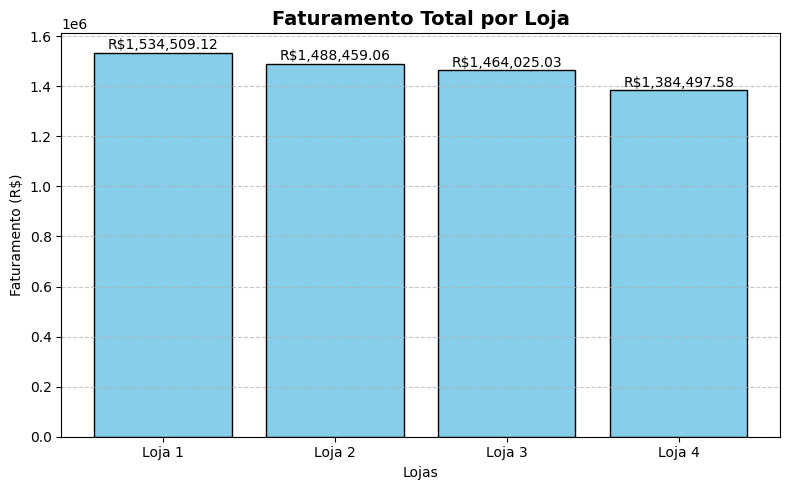

In [ ]:
# Cálculo do faturamento total de cada loja
faturamentos = [
    loja["Preço"].sum(),
    loja2["Preço"].sum(),
    loja3["Preço"].sum(),
    loja4["Preço"].sum()
]

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color='skyblue', edgecolor='black')
plt.title("Faturamento Total por Loja", fontsize=14, fontweight='bold')
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(faturamentos):
    plt.text(i, valor + (valor * 0.01), f"R${valor:,.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria

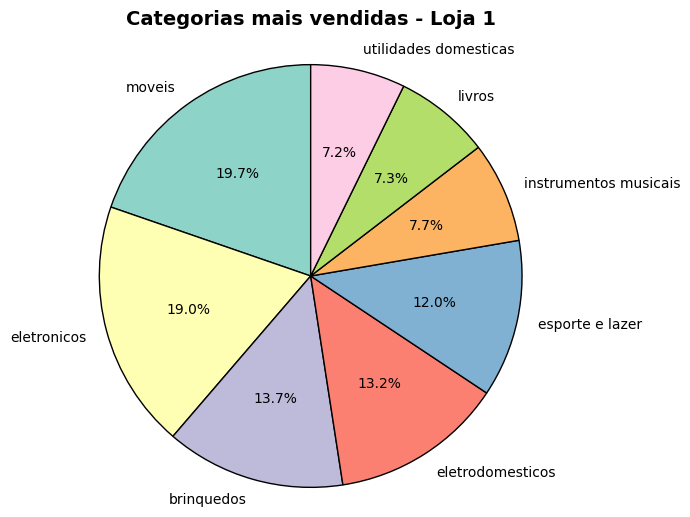

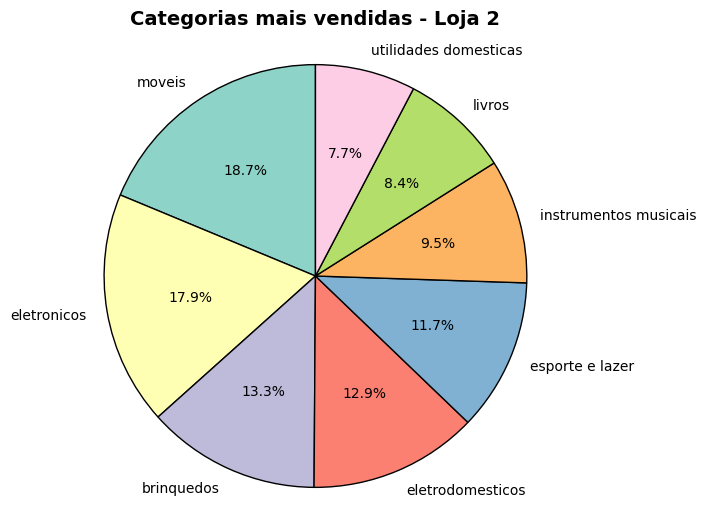

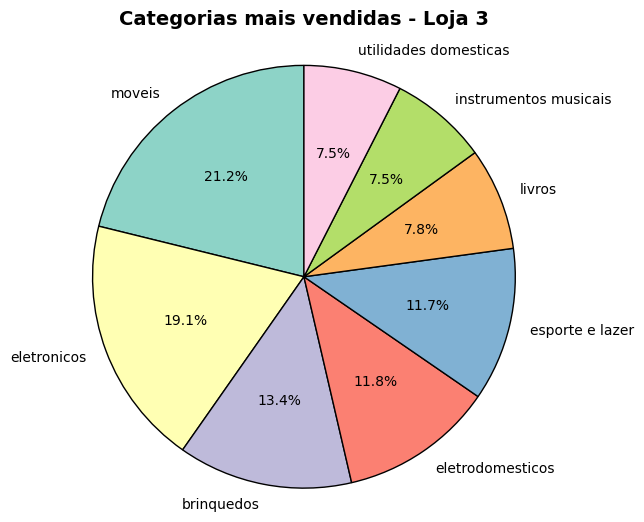

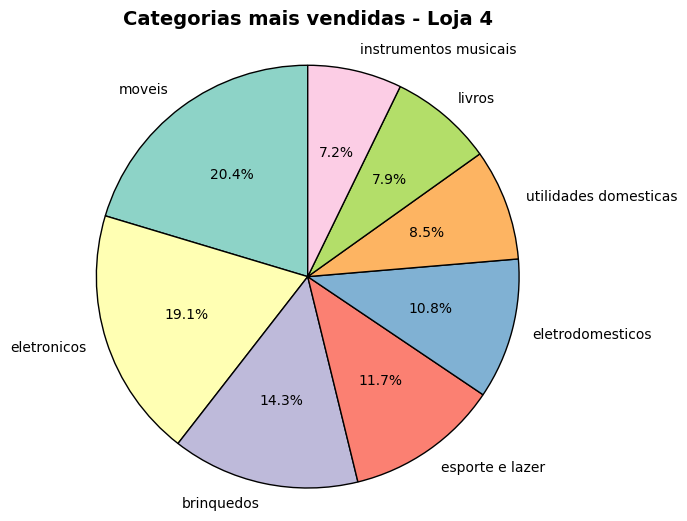

In [ ]:
def mais_vendidos(df, titulo):
    categorias = df["Categoria do Produto"].value_counts()

    plt.figure(figsize=(6,6))
    plt.pie(
        categorias.values,
        labels=categorias.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 10}
    )
    plt.title(titulo, fontsize=14, fontweight='bold', pad=15)
    plt.axis('equal')
    plt.show()

mais_vendidos(loja,  "Categorias mais vendidas - Loja 1")
mais_vendidos(loja2, "Categorias mais vendidas - Loja 2")
mais_vendidos(loja3, "Categorias mais vendidas - Loja 3")
mais_vendidos(loja4, "Categorias mais vendidas - Loja 4")


# 3. Média de Avaliação das Lojas


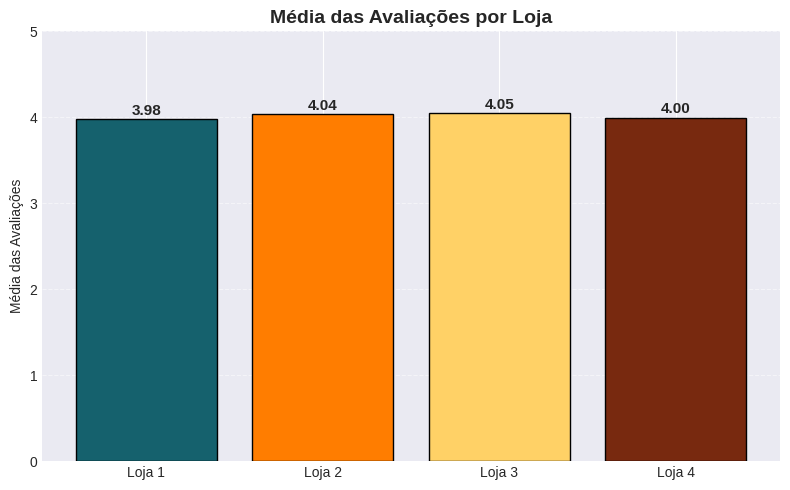

In [ ]:
# Cálculo da média de avaliação (coluna "Avaliação da compra")
media_loja1 = loja["Avaliação da compra"].mean()
media_loja2 = loja2["Avaliação da compra"].mean()
media_loja3 = loja3["Avaliação da compra"].mean()
media_loja4 = loja4["Avaliação da compra"].mean()

# Listas para o gráfico
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [media_loja1, media_loja2, media_loja3, media_loja4]

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(lojas, medias, color=["#15616d", "#ff7d00", "#ffd166", "#78290f"], edgecolor="black")

plt.title("Média das Avaliações por Loja", fontsize=14, fontweight="bold")
plt.ylabel("Média das Avaliações")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Valores acima das barras
for i, valor in enumerate(medias):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha="center", fontsize=11, fontweight="bold")

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

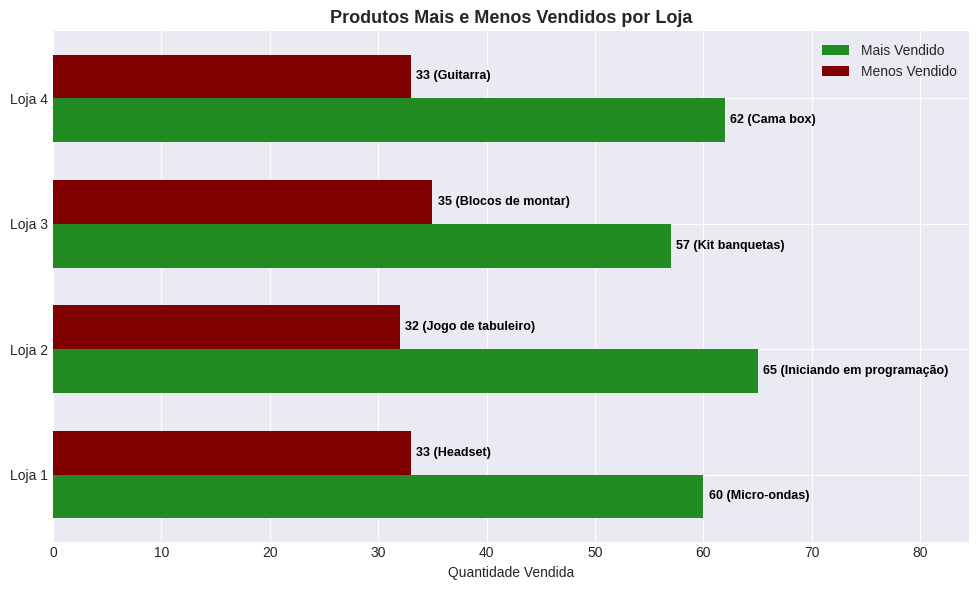

In [ ]:
def resumo_vendas(loja):
    contagem = loja["Produto"].value_counts()
    return contagem.idxmax(), contagem.max(), contagem.idxmin(), contagem.min()


lojas_dados = [loja, loja2, loja3, loja4]
lojas = [f"Loja {i+1}" for i in range(len(lojas_dados))]

dados = [resumo_vendas(l) for l in lojas_dados]
mais_prod, mais_qtd, menos_prod, menos_qtd = zip(*dados)

# Gráfico
plt.style.use('seaborn-v0_8-darkgrid')
y = np.arange(len(lojas))
altura = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
barras_mais = ax.barh(y - altura/2, mais_qtd, altura, label="Mais Vendido", color="#228B22")
barras_menos = ax.barh(y + altura/2, menos_qtd, altura, label="Menos Vendido", color="#800000")

for i in range(len(lojas)):
    ax.text(mais_qtd[i] + 0.5, y[i] - altura/2, f"{mais_qtd[i]} ({mais_prod[i]})",
            va='center', fontsize=9, color="black", fontweight='bold')
    ax.text(menos_qtd[i] + 0.5, y[i] + altura/2, f"{menos_qtd[i]} ({menos_prod[i]})",
            va='center', fontsize=9, color="black", fontweight='bold')

ax.set_yticks(y)
ax.set_yticklabels(lojas)
ax.set_xlabel("Quantidade Vendida")
ax.set_title("Produtos Mais e Menos Vendidos por Loja", fontsize=13, fontweight='bold')
ax.legend(frameon=False)
ax.set_xlim(0, max(max(mais_qtd), max(menos_qtd)) * 1.3)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja

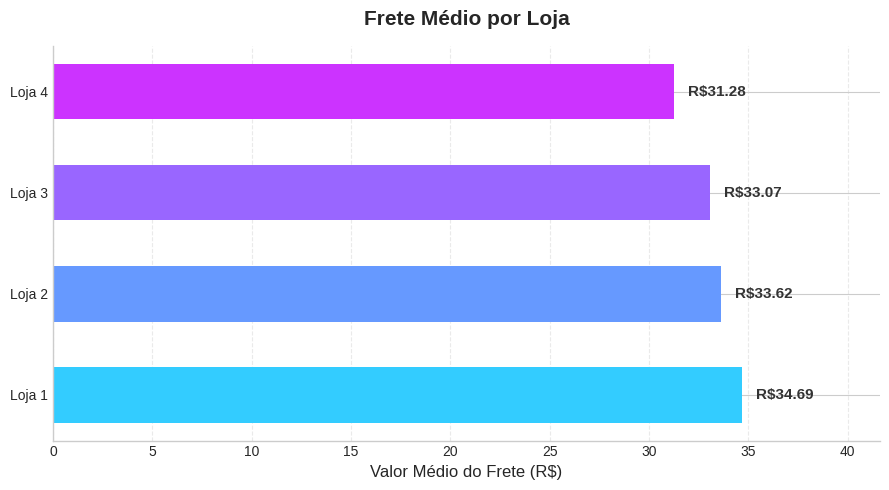

In [ ]:
def frete_medio(loja):
    return round(loja["Frete"].mean(), 2)

lojas_dados = [loja, loja2, loja3, loja4]
lojas = [f"Loja {i+1}" for i in range(len(lojas_dados))]
frete_lojas = [frete_medio(l) for l in lojas_dados]

# Grafico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(9,5))
cores = plt.cm.cool(np.linspace(0.2, 0.8, len(lojas)))
barras = ax.barh(lojas, frete_lojas, color=cores, edgecolor='none', height=0.55)

ax.set_title("Frete Médio por Loja", fontsize=15, fontweight='bold', pad=15)
ax.set_xlabel("Valor Médio do Frete (R$)", fontsize=12)
ax.set_xlim(0, max(frete_lojas) * 1.2)
ax.grid(axis='x', linestyle='--', alpha=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, barra in enumerate(barras):
    valor = barra.get_width()
    ax.text(valor + (max(frete_lojas)*0.02), barra.get_y() + barra.get_height()/2,
            f"R${valor:.2f}", va='center', fontsize=11, fontweight='bold', color='#333333')

plt.tight_layout()
plt.show()


## Relatório

**Introdução**

*O objetivo desta análise foi avaliar o desempenho das quatro lojas do Senhor João, considerando indicadores como faturamento, categorias de produtos mais vendidos, avaliações dos clientes, produtos mais e menos vendidos e frete médio.
A partir desses dados e dos gráficos gerados, buscou-se identificar qual loja apresenta o pior desempenho geral e, portanto, deve ser vendida.*

**Desenvolvimento**

*A análise do faturamento total mostrou que a Loja 4 tem o menor volume de vendas, mesmo apresentando o frete médio mais baixo entre todas as unidades.
Nas avaliações dos clientes, ela ficou com a segunda pior média, sendo que 25,6% dos consumidores deram notas entre 1 e 3, o que indica insatisfação relevante.*
*Além disso, a Loja 4 se destaca apenas em duas categorias — Brinquedos e Utilidades domésticas — e uma delas está entre as de menor volume de vendas, mostrando baixa diversificação e alcance limitado.
Em comparação, as demais lojas apresentaram melhores resultados:*

*Loja 1: alto faturamento, mas avaliações medianas.

*Loja 2: vendas equilibradas entre categorias.

*Loja 3: boa média de avaliações, frete competitivo e faturamento sólido.


**Conclusão**

*Com base nas análises, a Loja 4 é a que deve ser vendida.
Apesar do frete baixo, possui o menor faturamento, baixa satisfação dos clientes e pouca diversidade de produtos, sendo a menos competitiva e menos lucrativa.
Portanto, é a loja menos vantajosa para manter no portfólio do Senhor João.*
